In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [35]:
clim_data = pd.read_csv('D:/Downloads/GlobalLandTemp/GlobalLandTemperaturesByState.csv')

In [36]:
clim_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,dt_flush,year
0,1855-05-01,25.544,1.171,Acre,Brazil,1855-05-01,1855
1,1855-06-01,24.228,1.103,Acre,Brazil,1855-06-01,1855
2,1855-07-01,24.371,1.044,Acre,Brazil,1855-07-01,1855
3,1855-08-01,25.427,1.073,Acre,Brazil,1855-08-01,1855
4,1855-09-01,25.675,1.014,Acre,Brazil,1855-09-01,1855


In [37]:
# I have worked with this data before so I am dropping dt and dt_flush.
# I soon come to find out that dropping dt was not the best of ideas. 
clim_data.drop(columns=['dt', 'dt_flush'])

,AverageTemperature,AverageTemperatureUncertainty,State,Country,year
0,25.544,1.171,Acre,Brazil,1855
1,24.228,1.103,Acre,Brazil,1855
2,24.371,1.044,Acre,Brazil,1855
3,25.427,1.073,Acre,Brazil,1855
4,25.675,1.014,Acre,Brazil,1855
...,...,...,...,...,...
645670,21.634,0.578,Zhejiang,China,2013
645671,24.679,0.596,Zhejiang,China,2013
645672,29.272,1.340,Zhejiang,China,2013
645673,29.202,0.869,Zhejiang,China,2013


In [38]:
# Drop unnecssary rows for this analysis. 
clim_data = clim_data[['year', 'AverageTemperature', 'State', 'Country']]

In [39]:
clim_data.head()

,year,AverageTemperature,State,Country
0,1855,25.544,Acre,Brazil
1,1855,24.228,Acre,Brazil
2,1855,24.371,Acre,Brazil
3,1855,25.427,Acre,Brazil
4,1855,25.675,Acre,Brazil


In [40]:
clim_data.describe()

,year,AverageTemperature
count,645675.000000,620027.000000
mean,1898.178941,8.993111
std,69.840166,13.772150
min,1743.000000,-45.389000
25%,1845.000000,-0.693000
50%,1901.000000,11.199000
75%,1957.000000,19.899000
max,2013.000000,36.339000


In [41]:
clim_data.isnull().sum()

year                      0
AverageTemperature    25648
State                     0
Country                   0
dtype: int64

In [42]:
# Drop null values

clim_data = clim_data.dropna(how='any', axis=0)

In [43]:
clim_data.isnull().sum()

year                  0
AverageTemperature    0
State                 0
Country               0
dtype: int64

In [44]:
clim_data.head()

,year,AverageTemperature,State,Country
0,1855,25.544,Acre,Brazil
1,1855,24.228,Acre,Brazil
2,1855,24.371,Acre,Brazil
3,1855,25.427,Acre,Brazil
4,1855,25.675,Acre,Brazil


In [45]:
clim_data.rename(columns={'year': 'Date', 'AverageTemperature' : 'AvgTemp'}, inplace = True)
clim_data.head()

,Date,AvgTemp,State,Country
0,1855,25.544,Acre,Brazil
1,1855,24.228,Acre,Brazil
2,1855,24.371,Acre,Brazil
3,1855,25.427,Acre,Brazil
4,1855,25.675,Acre,Brazil


In [46]:
clim_data.dtypes

Date         int64
AvgTemp    float64
State       object
Country     object
dtype: object

In [47]:
# Convert the date column into a datetime

clim_data['Date'] = pd.to_datetime(clim_data['Date'], format='%Y')
clim_data.set_index('Date', inplace=True)
clim_data.index

DatetimeIndex(['1855-01-01', '1855-01-01', '1855-01-01', '1855-01-01',
               '1855-01-01', '1855-01-01', '1855-01-01', '1855-01-01',
               '1856-01-01', '1856-01-01',
               ...
               '2012-01-01', '2012-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [48]:
clim_data['Year'] = clim_data.index.year
clim_data

,AvgTemp,State,Country,Year
Date,,,,
1855-01-01,25.544,Acre,Brazil,1855
1855-01-01,24.228,Acre,Brazil,1855
1855-01-01,24.371,Acre,Brazil,1855
1855-01-01,25.427,Acre,Brazil,1855
1855-01-01,25.675,Acre,Brazil,1855
...,...,...,...,...
2013-01-01,15.710,Zhejiang,China,2013
2013-01-01,21.634,Zhejiang,China,2013
2013-01-01,24.679,Zhejiang,China,2013


In [49]:
clim_data[['Country', 'AvgTemp']].groupby(['Country']).mean().sort_values('AvgTemp')


,AvgTemp
Country,
Canada,-1.321079
Russia,1.808555
United States,10.701555
China,11.206830
Australia,17.664222
India,22.534576
Brazil,23.770601


In [50]:
annual_data = clim_data[['AvgTemp']].resample('A').mean()
annual_data.head()

,AvgTemp
Date,
1743-12-31,-0.455638
1744-12-31,8.594520
1745-12-31,-3.487781
1746-12-31,NaN
1747-12-31,NaN


In [51]:
annual_data = annual_data.dropna(how='any', axis=0)
annual_data

,AvgTemp
Date,
1743-12-31,-0.455638
1744-12-31,8.594520
1745-12-31,-3.487781
1750-12-31,7.286944
1751-12-31,7.758388
...,...
2009-12-31,10.395510
2010-12-31,10.620230
2011-12-31,10.434743


<function matplotlib.pyplot.show(close=None, block=None)>

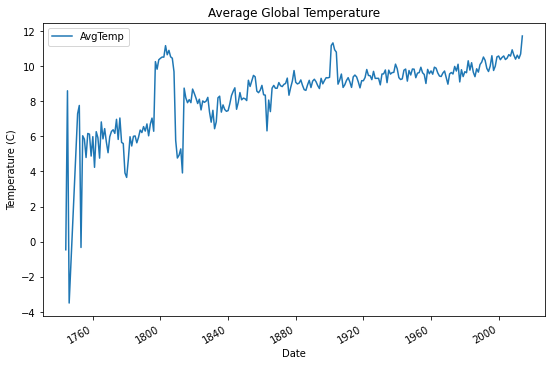

In [52]:
# plot annual global temperature for the entire dataset

annual_data.plot(figsize = (9,6))
plt.title("Average Global Temperature")
plt.ylabel("Temperature (C)")
plt.show

In [53]:
# single the US out of the dataset
us_clim = ["United States"]
us_climate = clim_data[clim_data.Country.isin(us_clim)]
latest_us = us_climate[us_climate.Year > 1900]

In [54]:
us_climate

,AvgTemp,State,Country,Year
Date,,,,
1743-01-01,10.722,Alabama,United States,1743
1744-01-01,19.075,Alabama,United States,1744
1744-01-01,21.197,Alabama,United States,1744
1744-01-01,25.290,Alabama,United States,1744
1744-01-01,26.420,Alabama,United States,1744
...,...,...,...,...
2013-01-01,10.607,Wyoming,United States,2013
2013-01-01,16.267,Wyoming,United States,2013
2013-01-01,20.222,Wyoming,United States,2013


In [55]:
# single the Northwest out of the dataset

northwest = ["Washington", "Oregon", "Idaho", "Montana"]
nw_climate = us_climate[us_climate.State.isin(northwest)]
nw_climate

,AvgTemp,State,Country,Year
Date,,,,
1821-01-01,-0.353,Idaho,United States,1821
1821-01-01,-6.683,Idaho,United States,1821
1822-01-01,-6.129,Idaho,United States,1822
1822-01-01,-2.842,Idaho,United States,1822
1822-01-01,3.068,Idaho,United States,1822
...,...,...,...,...
2013-01-01,12.286,Washington,United States,2013
2013-01-01,15.215,Washington,United States,2013
2013-01-01,19.717,Washington,United States,2013


In [57]:
# choose more recent data to ensure a higher quality 

latest_nw = nw_climate[nw_climate.Year > 1900]
latest_nw 

,AvgTemp,State,Country,Year
Date,,,,
1901-01-01,-5.122,Idaho,United States,1901
1901-01-01,-4.655,Idaho,United States,1901
1901-01-01,0.056,Idaho,United States,1901
1901-01-01,3.747,Idaho,United States,1901
1901-01-01,11.644,Idaho,United States,1901
...,...,...,...,...
2013-01-01,12.286,Washington,United States,2013
2013-01-01,15.215,Washington,United States,2013
2013-01-01,19.717,Washington,United States,2013


In [58]:
#finding the mean temp for each state from 1900-2013

latest_nw[['State', 'AvgTemp']].groupby(['State']).mean().sort_values('AvgTemp')

,AvgTemp
State,
Montana,5.357902
Idaho,5.613718
Washington,7.869004
Oregon,8.355078


In [59]:
annual_nw = latest_nw[['AvgTemp']].resample('A').mean()
annual_nw

,AvgTemp
Date,
1901-12-31,6.843625
1902-12-31,6.201958
1903-12-31,5.980313
1904-12-31,6.880271
1905-12-31,6.451458
...,...
2009-12-31,6.854083
2010-12-31,7.090917
2011-12-31,6.630688


<AxesSubplot:title={'center':'Global (blue) vs NW Temperatures (yellow)'}, xlabel='Date'>

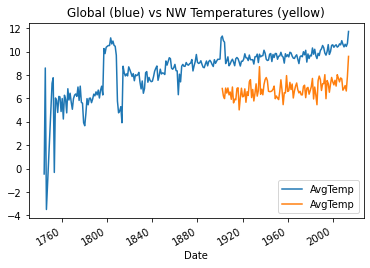

In [60]:
# plot global mean temperature vs NW temperatures 

ax = annual_data.plot()
annual_nw.plot(ax=ax, title = 'Global (blue) vs NW Temperatures (yellow)')


In [ ]:
# We can see the NW temperatures are rising quite a bit quicker
# than the rest of the world. 

Text(0, 0.5, 'Temperature')

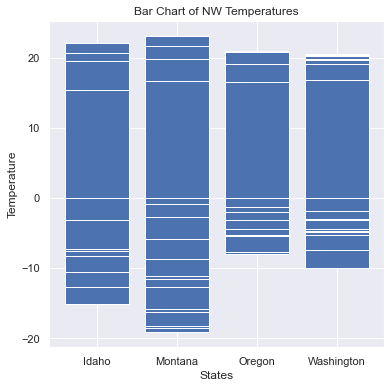

In [97]:
plt.bar(latest_nw['State'],latest_nw['AvgTemp'] )
plt.title('Bar Chart of NW Temperatures')
plt.xlabel('States')
plt.ylabel('Temperature')


In [ ]:
# Montana clearly has the biggest variation which makes sense. It is a huge state
# and is more inland leading to a higher temperature variation.
# What I find interesting here is the fact Oregon has less variation than
# Washington does. The Eastern side of Washington is highly variable, however.

In [101]:
# create a dataframe for each state to plot

idaho = latest_nw.loc[latest_nw['State'] == 'Idaho']
washington = latest_nw.loc[latest_nw['State'] == 'Washington']
montana = latest_nw.loc[latest_nw['State'] == 'Montana']
oregon = latest_nw.loc[latest_nw['State'] == 'Oregon']
idaho

,AvgTemp,State,Country,Year
Date,,,,
1901-01-01,-5.122,Idaho,United States,1901
1901-01-01,-4.655,Idaho,United States,1901
1901-01-01,0.056,Idaho,United States,1901
1901-01-01,3.747,Idaho,United States,1901
1901-01-01,11.644,Idaho,United States,1901
...,...,...,...,...
2013-01-01,10.607,Idaho,United States,2013
2013-01-01,15.136,Idaho,United States,2013
2013-01-01,20.733,Idaho,United States,2013


<AxesSubplot:xlabel='Year'>

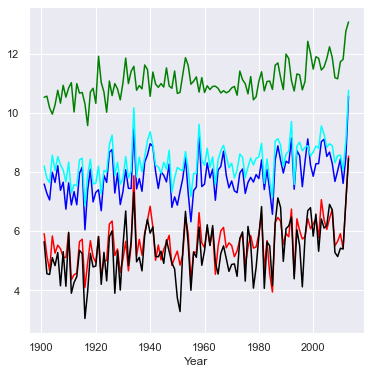

In [105]:
# Plot each state and compare that with the US as a whole 
idaho.groupby('Year')['AvgTemp'].mean().plot(color = 'Red')
washington.groupby('Year')['AvgTemp'].mean().plot(color = 'Blue')
montana.groupby('Year')['AvgTemp'].mean().plot(color = 'Black')
oregon.groupby('Year')['AvgTemp'].mean().plot(color = 'Cyan')
latest_us.groupby('Year')['AvgTemp'].mean().plot(color = 'Green')

# Oregon and Washington follow similar paths with Montana and Idaho noticably
# cooler overall. We see a big spike at the end of the dataset. 
# The NW is about 2 degrees cooler than the rest of the US. But the data shows
# that it is heating up quicker than the US as a whole is. 

<AxesSubplot:>

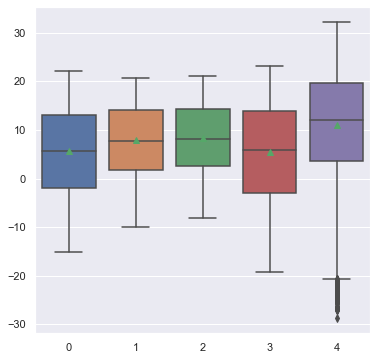

In [109]:
# Lets also visualize the same data in a box plot. 
# Here it is easier to compare means
# WA and OR have roughly the same mean with the US being quite a bit higher.
# ID and MT are also roughly the same but lag behind. 

sns.set(rc={"figure.figsize":(6, 6)})
sns.boxplot(
    data = [idaho['AvgTemp'], 
            washington['AvgTemp'], 
            oregon['AvgTemp'], 
            montana['AvgTemp'], 
            latest_us['AvgTemp']],
    showmeans=True,
)